# Schelling's model of segregation

If you look at the racial distribution of multi-ethnic cities, you'll be astonished by the incredible racial segregation. For example, the New York City map below represents data from the 2010 US Census color-coded by race. You can clearly see the racial segregation.

Many would conclude from such phenomena that people are intolerant, and don't want to live next to people that are different from them. A deeper look, however, might provide some nuance. In the 70's, Thomas Schelling, the 2005 Economics Nobel Prize winner, was interested in this subject and built an agent-based model for explaining this phenomenon. With a very simple model, Schelling could show that what we see at the macro level may not in fact represent what's going down in the micro level.

We'll run a few simulations using the Schelling model to get a deeper understanding of the segregation phenomena.

![](segregation-new-york-city.jpg)

# 1. The model

Agent-based models need three parameters: 1) Agents, 2) Behavior (rules) and 3) Metrics at the aggregated level. In the Schelling model, the agents are the people living in the city, the behavior is the house moving based on the similarity ratio and the metrics at the aggregated level is the similarity ratio.

Let n be the number of races living in a city. We represent each race by a unique color and we represent the city by a grid where each cell represents a house. A house can be either empty or full. A full house can have have only one person living in it. If the house is empty, we color it in white. If the house is full, we color it by the color of the person living in it. We define the neighbors of a person to be the people living in the adjacent houses (Up, Bottom, Left, Right, Up-Left, Up-Right, Bottom-Left, Bottom-Right).

Schelling's goal was to test what would happen if people had a small preference that their neighbors be of the same color (or even preference for some diversity). If the ratio of neighbors of the same race is above a certain threshold (that we call Similarity Threshold), we say that the person is satisfied. If not, we say that the person is unsatisfied.

The Schelling simulation goes as follows. We start by randomly putting people in the city and we leave some houses empty. For each person living in the city, we check if he/she is satisfied. If satisfied, we don't do anything. If not, we move the person to an empty house. We run this simulation for a few iterations, and we check the final distribution of the people.

## Exercise

Run the below simulation and observe how the races tend to agglomerate in clusters.

Go to the OpenProcessing web and, in the first lines of the code, change the parameters:
- Number of races. As more races involved, as longer the computing time to get a stable situation. Decrease the size of the board to get faster results.
- Change the ratio of similarity, i.e. the minimum ratio of neighbours of the same race that make a person stay in the house.

In [57]:
%%HTML
<iframe src="https://www.openprocessing.org/sketch/437057/embed/" width="510" height="510"></iframe>

## Exercise

Now, we implment the model in Python to calculate some metrics.

Read the commentaries in the code, explaining the meaning of the methods.

In [58]:

# Class to store and manage the data of the neighbourhood.
class Schelling:
    
    # Create this data object and init the variables.
    def __init__(self, width, height, empty_ratio, similarity_threshold, n_iterations, races = 2):
        self.width = width 
        self.height = height 
        self.races = races
        self.empty_ratio = empty_ratio
        self.similarity_threshold = similarity_threshold
        self.n_iterations = n_iterations
        self.empty_houses = []
        self.agents = {}

        
    # This method is used at the beginning of the simulation,
    # to randomly distribute the people in the grid
    def populate(self):
        self.all_houses = list(itertools.product(range(self.width),range(self.height)))
        random.shuffle(self.all_houses)

        self.n_empty = int( self.empty_ratio * len(self.all_houses) )
        self.empty_houses = self.all_houses[:self.n_empty]

        self.remaining_houses = self.all_houses[self.n_empty:]
        houses_by_race = [self.remaining_houses[i::self.races] for i in range(self.races)]
        for i in range(self.races):
            #create agents for each race
            self.agents.update(dict(zip(houses_by_race[i], [i+1]*len(houses_by_race[i]))))

            
    # This method takes the (x, y) coordinates of a house as arguments, 
    # checks the ratio of neighbors of similar color, 
    # and returns True if the ratio is above the happiness threshold, otherwise it returns False.
    def is_unsatisfied(self, x, y):
        race = self.agents[(x,y)]
        count_similar = 0
        count_different = 0

        if x > 0 and y > 0 and (x-1, y-1) not in self.empty_houses:
            if self.agents[(x-1, y-1)] == race:
                count_similar += 1
            else:
                count_different += 1
        if y > 0 and (x,y-1) not in self.empty_houses:
            if self.agents[(x,y-1)] == race:
                count_similar += 1
            else:
                count_different += 1
        if x < (self.width-1) and y > 0 and (x+1,y-1) not in self.empty_houses:
            if self.agents[(x+1,y-1)] == race:
                count_similar += 1
            else:
                count_different += 1
        if x > 0 and (x-1,y) not in self.empty_houses:
            if self.agents[(x-1,y)] == race:
                count_similar += 1
            else:
                count_different += 1        
        if x < (self.width-1) and (x+1,y) not in self.empty_houses:
            if self.agents[(x+1,y)] == race:
                count_similar += 1
            else:
                count_different += 1
        if x > 0 and y < (self.height-1) and (x-1,y+1) not in self.empty_houses:
            if self.agents[(x-1,y+1)] == race:
                count_similar += 1
            else:
                count_different += 1        
        if x > 0 and y < (self.height-1) and (x,y+1) not in self.empty_houses:
            if self.agents[(x,y+1)] == race:
                count_similar += 1
            else:
                count_different += 1        
        if x < (self.width-1) and y < (self.height-1) and (x+1,y+1) not in self.empty_houses:
            if self.agents[(x+1,y+1)] == race:
                count_similar += 1
            else:
                count_different += 1

        if (count_similar+count_different) == 0:
            return False
        else:
            return float(count_similar)/(count_similar+count_different) < self.similarity_threshold

        
    # This method checks if each person in the grid is unsatisfied.
    # If yes it assigns the person to a randomly chosen empty house.
    # It runs this process n_iterations times
    def update(self):
        for i in range(self.n_iterations):
            plt.draw()
            self.old_agents = copy.deepcopy(self.agents)
            n_changes = 0
            for agent in self.old_agents:
                if self.is_unsatisfied(agent[0], agent[1]):
                    agent_race = self.agents[agent]
                    empty_house = random.choice(self.empty_houses)
                    self.agents[empty_house] = agent_race
                    del self.agents[agent]
                    self.empty_houses.remove(empty_house)
                    self.empty_houses.append(agent)
                    n_changes += 1
            #print(n_changes)
            if n_changes == 0:
                break


    # This method takes the (x, y) coordinates of a house as arguments,
    # and moves the person living in the (x, y) house to an empty house.
    # This method is called within the update method to move the unsatisfied people to empty houses.             
    def move_to_empty(self, x, y):
        race = self.agents[(x,y)]
        empty_house = random.choice(self.empty_houses)
        self.updated_agents[empty_house] = race
        del self.updated_agents[(x, y)]
        self.empty_houses.remove(empty_house)
        self.empty_houses.append((x, y))
        
        
    # This method draws the whole city and people living in the city. 
    # We can call this method at anytime to check the distribution of people in the city.
    def plot(self, title, numSubplot):
        ax = plt.subplot(1, 2, numSubplot)
        #If you want to run the simulation with more than 7 colors, you should set agent_colors accordingly
        agent_colors = {1:'b', 2:'r', 3:'g', 4:'c', 5:'m', 6:'y', 7:'k'}
        for agent in self.agents:
            ax.scatter(agent[0]+0.5, agent[1]+0.5, color=agent_colors[self.agents[agent]])

        ax.set_title(title, fontsize=10, fontweight='bold')
        ax.set_xlim([0, self.width])
        ax.set_ylim([0, self.height])
        ax.set_xticks([])
        ax.set_yticks([])
      
    
    # This method calculates the similarity ratio for each agent and returns the mean similarity ratio. 
    # We'll use the mean similarity ratio as a measure of segregation.
    def calculate_similarity(self):
        similarity = []
        for agent in self.agents:
            count_similar = 0
            count_different = 0
            x = agent[0]
            y = agent[1]
            race = self.agents[(x,y)]
            if x > 0 and y > 0 and (x-1, y-1) not in self.empty_houses:
                if self.agents[(x-1, y-1)] == race:
                    count_similar += 1
                else:
                    count_different += 1
            if y > 0 and (x,y-1) not in self.empty_houses:
                if self.agents[(x,y-1)] == race:
                    count_similar += 1
                else:
                    count_different += 1
            if x < (self.width-1) and y > 0 and (x+1,y-1) not in self.empty_houses:
                if self.agents[(x+1,y-1)] == race:
                    count_similar += 1
                else:
                    count_different += 1
            if x > 0 and (x-1,y) not in self.empty_houses:
                if self.agents[(x-1,y)] == race:
                    count_similar += 1
                else:
                    count_different += 1        
            if x < (self.width-1) and (x+1,y) not in self.empty_houses:
                if self.agents[(x+1,y)] == race:
                    count_similar += 1
                else:
                    count_different += 1
            if x > 0 and y < (self.height-1) and (x-1,y+1) not in self.empty_houses:
                if self.agents[(x-1,y+1)] == race:
                    count_similar += 1
                else:
                    count_different += 1        
            if x > 0 and y < (self.height-1) and (x,y+1) not in self.empty_houses:
                if self.agents[(x,y+1)] == race:
                    count_similar += 1
                else:
                    count_different += 1        
            if x < (self.width-1) and y < (self.height-1) and (x+1,y+1) not in self.empty_houses:
                if self.agents[(x+1,y+1)] == race:
                    count_similar += 1
                else:
                    count_different += 1
            try:
                similarity.append(float(count_similar)/(count_similar+count_different))
            except:
                similarity.append(1)
        return sum(similarity)/len(similarity)        

Now that we have our implementation of the Schelling class, we can run different simulations and plot the results. We'll build a simulation with the following characteristics:

- Width = 30, and height = 30 (900 houses)
- 30% of empty houses
- Maximum number of iterations = 500
- Number of races = 2

To analise the impact of the similarity, run the simulation three times for three different similarity thresholds:
- Similarity Threshold of 30%, 50%, and 80%


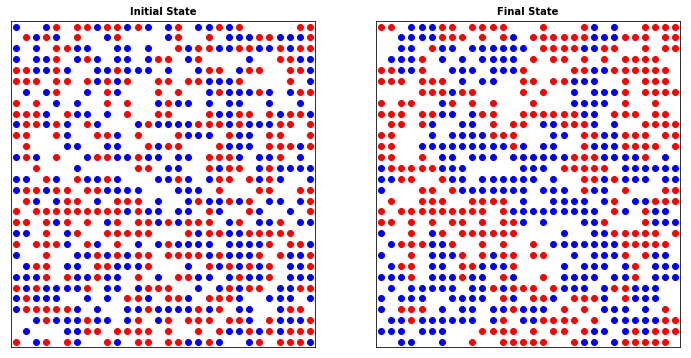

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6), dpi=72);

empty_ratio = 0.3
similarity_threshold = 0.3
n_iterations = 5000
races = 2

schelling_1 = Schelling(30, 30, empty_ratio, similarity_threshold, n_iterations, races)
schelling_1.populate()
schelling_1.plot('Initial State', 1)
schelling_1.update()
schelling_1.plot('Final State', 2)
plt.show()

# 2. Measuring segregation

Looking at the plots above, we can see that the higher the similarity threshold, the more segregated the city becomes. Furthermore, we can see that even with a small similarity threshold, we get segregated cities. In other words, even if the people are very tolerant (i.e. having a small Similarity threshold), we end up with segregation. We can conclude that what we see at the macro level may not in fact represent what's going down in the micro level.

We'll define a quantitative measure for calculating segregation. in the code, the calculate_similarity method performs this calculation. Read the commentary for a better explanation.

## Exercise

Next, we'll calculate the mean similarity ratio for different similarity thresholds, and plot the relationship between the similarity threshold and the similarity ratio.

You can see from the plot above that for very small similarity thresholds, we get very high segregation (defined by the mean similarity ratio). For example, for a similarity threshold of 0.3, we got a mean similarity ratio of 0.75. We could confirm quantitatively that what we see at the macro level may not in fact represent what's going down in the micro level.

As well, the relation between the Similarity Threshold and the Mean Similarity Ratio is non-linear.

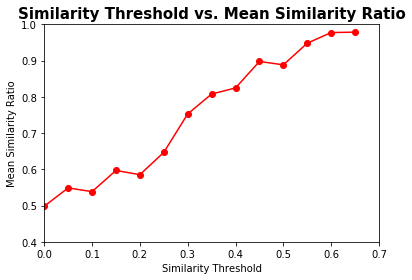

In [86]:
%matplotlib inline
import numpy as np

similarity_ratio   = np.arange(0, 0.7, 0.05)
similarity_average = np.zeros(len(similarity_ratio))

iterations = 20
for iter in range(iterations):
    for ix,ratio in enumerate(similarity_ratio):
        schelling = Schelling(10, 10, 0.3, ratio, 500, 2)
        schelling.populate()
        schelling.update()
        similarity_average[ix] += schelling.calculate_similarity()

similarity_average = similarity_average/iterations
        
fig, ax = plt.subplots();
plt.plot(similarity_ratio, similarity_average, 'ro-');
ax.set_title('Similarity Threshold vs. Mean Similarity Ratio', fontsize=15, fontweight='bold');
ax.set_xlim([0, 0.7]);
ax.set_ylim([0.4, 1]);
ax.set_xlabel("Similarity Threshold");
ax.set_ylabel("Mean Similarity Ratio");
plt.show();

# References
- Clark, W. AV. ["Residential preferences and neighborhood racial segregation: A test of the Schelling segregation
model."](http://smg.media.mit.edu/library/Clark.ResidentialSegregation.pdf) Demography 28.1 (1991): 1-19.
- Moujahid, A. ["An introduction to agent-based models: simulating segregation with Python"](https://www.binpress.com/tutorial/introduction-to-agentbased-models-an-implementation-of-schelling-model-in-python/144)